In [11]:
import numpy as np

In [12]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

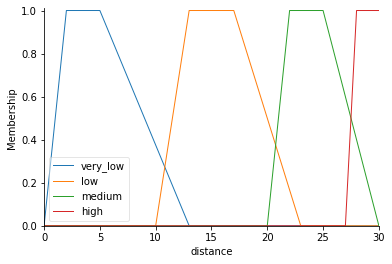

In [13]:
distance = ctrl.Antecedent(np.arange(0, 31, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 81, 1), 'speed')
brake = ctrl.Consequent(np.arange(0, 11, 1), 'brake')
deviation=ctrl.Antecedent(np.arange(-3,4,1),'deviation')
steering=ctrl.Consequent(np.arange(0,46,1),'steering')
#defining custom fuzzy sets for distance
distance['very_low']=fuzz.trapmf(distance.universe, [0,2, 5, 13])
distance['low']=fuzz.trapmf(distance.universe, [10, 13,17, 23])
distance['medium']=fuzz.trapmf(distance.universe, [20,22, 25, 30])
distance['high']=fuzz.trapmf(distance.universe, [27,28, 30, 30])
# defining custom fuzzy sets for deviation
deviation['steepL']=fuzz.trapmf(deviation.universe, [-3,-3, -3, -2])
deviation['minorL']=fuzz.trapmf(deviation.universe, [-2.5,-2, -1, -0.3])
deviation['balanced']=fuzz.trapmf(deviation.universe, [-1,-1,0, 1])
deviation['minorR']=fuzz.trapmf(deviation.universe, [0.5,1,2, 2.5])
deviation['steepR']=fuzz.trapmf(deviation.universe, [2,3, 3, 3])


#defining custom fuzzy sets for speed
speed['very_low']=fuzz.trapmf(speed.universe, [0, 15,30, 40])
speed['low']=fuzz.trapmf(speed.universe,[30,35,40,50])
speed['medium']=fuzz.trapmf(speed.universe,[40,45,50,60])
speed['high']=fuzz.trapmf(speed.universe,[55,60,80,80])

#defining custom fuzzy sets for force on brake
brake['low'] = fuzz.trapmf(brake.universe, [0, 1,2, 4])
brake['medium'] = fuzz.trapmf(brake.universe, [3,4, 5, 7])
brake['high'] = fuzz.trapmf(brake.universe, [6, 7,10, 10])

#defining custom fuzzy sets for steering angle
steering['small']=fuzz.trapmf(steering.universe,[0,2,10,20])
steering['medium']=fuzz.trapmf(steering.universe,[11,18,24,35])
steering['high']=fuzz.trapmf(steering.universe,[22,30,45,45])

distance.view()

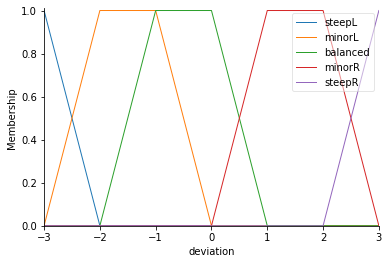

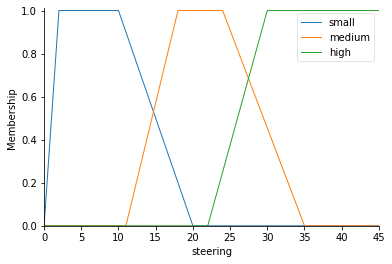

In [14]:
deviation.view()
steering.view()

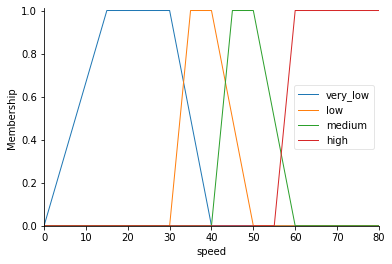

In [15]:
speed.view()

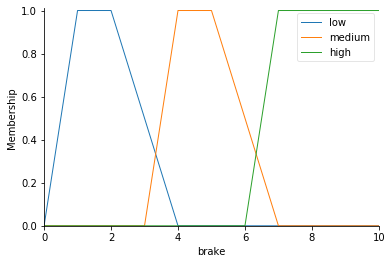

In [16]:
brake.view()


In [17]:

rule1 = ctrl.Rule(distance['very_low'] & speed['very_low'] , brake['medium'])

rule2 = ctrl.Rule(distance['very_low'] &speed['low'] , brake['high'])

rule3 = ctrl.Rule(distance['very_low'] &speed['medium'] , brake['high'])

rule4 = ctrl.Rule(distance['very_low'] &speed['high'] , brake['high'])

rule5 = ctrl.Rule(distance['low'] & speed['very_low'] , brake['low'])

rule6 = ctrl.Rule(distance['low'] & speed['low'] , brake['medium'])

rule7 = ctrl.Rule(distance['low'] & speed['medium'] , brake['high'])

rule8 = ctrl.Rule(distance['low'] & speed['high'] , brake['high'])

rule9 = ctrl.Rule(distance['medium'] & speed['very_low'] , brake['low'])

rule10 = ctrl.Rule(distance['medium'] & speed['low'] , brake['low'])

rule11 = ctrl.Rule(distance['medium'] & speed['medium'] , brake['medium'])

rule12 = ctrl.Rule(distance['medium'] & speed['high'] , brake['high'])

rule13 = ctrl.Rule(distance['high'] & speed['very_low'] , brake['low'])

rule14 = ctrl.Rule(distance['high'] & speed['low'] , brake['low'])

rule15 = ctrl.Rule(distance['high'] & speed['medium'] , brake['low'])

rule16 = ctrl.Rule(distance['high'] & speed['high'] , brake['medium'])

rule17=ctrl.Rule(deviation['steepL']&speed['very_low'],steering['medium'])
rule18=ctrl.Rule(deviation['steepL']&speed['low'],steering['medium'])
rule19=ctrl.Rule(deviation['steepL']&speed['medium'],steering['high'])
rule20=ctrl.Rule(deviation['steepL']&speed['high'],steering['high'])


rule21=ctrl.Rule(deviation['minorL']&speed['very_low'],steering['small'])
rule22=ctrl.Rule(deviation['minorL']&speed['low'],steering['medium'])
rule23=ctrl.Rule(deviation['minorL']&speed['medium'],steering['medium'])
rule24=ctrl.Rule(deviation['minorL']&speed['high'],steering['medium'])


rule25=ctrl.Rule(deviation['minorR']&speed['very_low'],steering['small'])
rule26=ctrl.Rule(deviation['minorR']&speed['low'],steering['small'])
rule27=ctrl.Rule(deviation['minorR']&speed['medium'],steering['medium'])
rule28=ctrl.Rule(deviation['minorR']&speed['high'],steering['medium'])



rule29=ctrl.Rule(deviation['steepR']&speed['very_low'],steering['medium'])
rule30=ctrl.Rule(deviation['steepR']&speed['low'],steering['medium'])
rule31=ctrl.Rule(deviation['steepR']&speed['medium'],steering['high'])
rule32=ctrl.Rule(deviation['steepR']&speed['high'],steering['high'])




In [18]:
brake_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32])


In [19]:
brake_ = ctrl.ControlSystemSimulation(brake_ctrl)


Enter distance between cars: 11
Enter relative speed: 55
Enter the Deviation: -2
8.082125603864736
22.538461538461544
TO RIGHT
Enter 1 to exit1


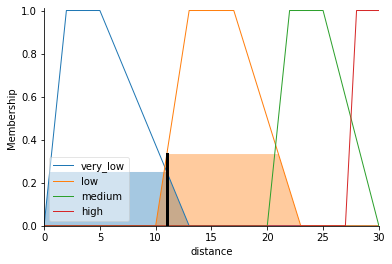

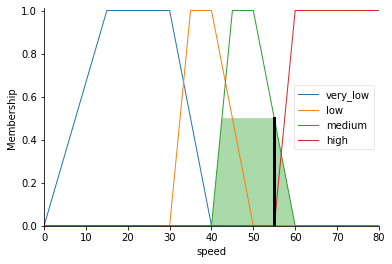

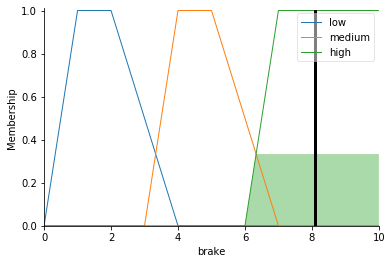

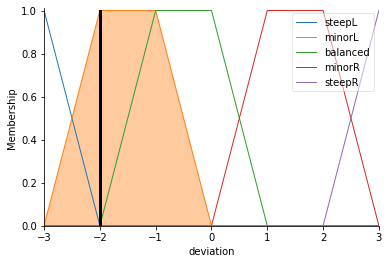

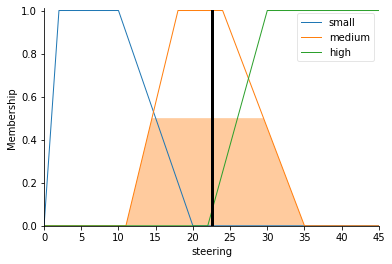

In [20]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
i=0
while i==0:
    
    _distance=int(input("Enter distance between cars: "))
    _speed=int(input("Enter relative speed: "))
    _deviation=int(input("Enter the Deviation: "))
    brake_.input["distance"]=_distance
    brake_.input["speed"]=_speed
    brake_.input["deviation"]=_deviation
    brake_.compute()
    distance.view(sim=brake_)
    speed.view(sim=brake_)
    brake.view(sim=brake_)
    deviation.view(sim=brake_)
    steering.view(sim=brake_)
    print (brake_.output['brake'])
    if(_deviation<0):
        print(brake_.output['steering'])
        print("TO RIGHT")




    if(_deviation>0):
        print(brake_.output['steering'])
        print("TO LEFT")
    
    i=int(input("Enter 1 to exit"))


        

    

